In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [26]:
df = pd.read_csv('./not_encoding.csv', encoding="utf-8-sig",index_col=0)
df.head()

,category,amt,gender,is_fraud,distance,age,recency,city_pop_category,trans_hour_category,trans_month_category,region
0,misc_net,4.97,F,0,48.838332,31,0.0,소도시,night,상반기,south
1,grocery_pos,107.23,F,0,18.773002,41,0.0,소도시,night,상반기,west
2,entertainment,220.11,M,0,67.236235,57,0.0,소도시,night,상반기,west
3,gas_transport,45.00,M,0,59.448672,52,0.0,소도시,night,상반기,west
4,misc_pos,41.96,M,0,48.191593,33,0.0,소도시,night,상반기,south


In [27]:
# 수치형 데이터 이상치 확인하기 위한 데이터프레임 
num_df = df[['amt','distance','age','recency','is_fraud']]
num_df

,amt,distance,age,recency,is_fraud
0,4.97,48.838332,31,0.0,0
1,107.23,18.773002,41,0.0,0
2,220.11,67.236235,57,0.0,0
3,45.00,59.448672,52,0.0,0
4,41.96,48.191593,33,0.0,0
...,...,...,...,...,...
1296670,15.56,74.410630,59,16781.0,0
1296671,51.70,46.667580,41,7962.0,0
1296672,105.93,61.545493,53,29074.0,0
1296673,74.90,52.585258,40,91018.0,0


In [29]:
# num_df 이상치 식별
num_df.describe()

,amt,distance,age,recency,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,7.035104e+01,4.729552e+01,4.602930e+01,3.246039e+04,5.788652e-03
std,1.603160e+02,1.809245e+01,1.738237e+01,4.733114e+04,7.586269e-02
min,1.000000e+00,1.382833e-02,1.400000e+01,0.000000e+00,0.000000e+00
25%,9.650000e+00,3.438357e+01,3.300000e+01,6.004000e+03,0.000000e+00
50%,4.752000e+01,4.861102e+01,4.400000e+01,1.656300e+04,0.000000e+00
75%,8.314000e+01,6.120718e+01,5.700000e+01,4.023900e+04,0.000000e+00
max,2.894890e+04,9.452136e+01,9.600000e+01,1.341471e+06,1.000000e+00


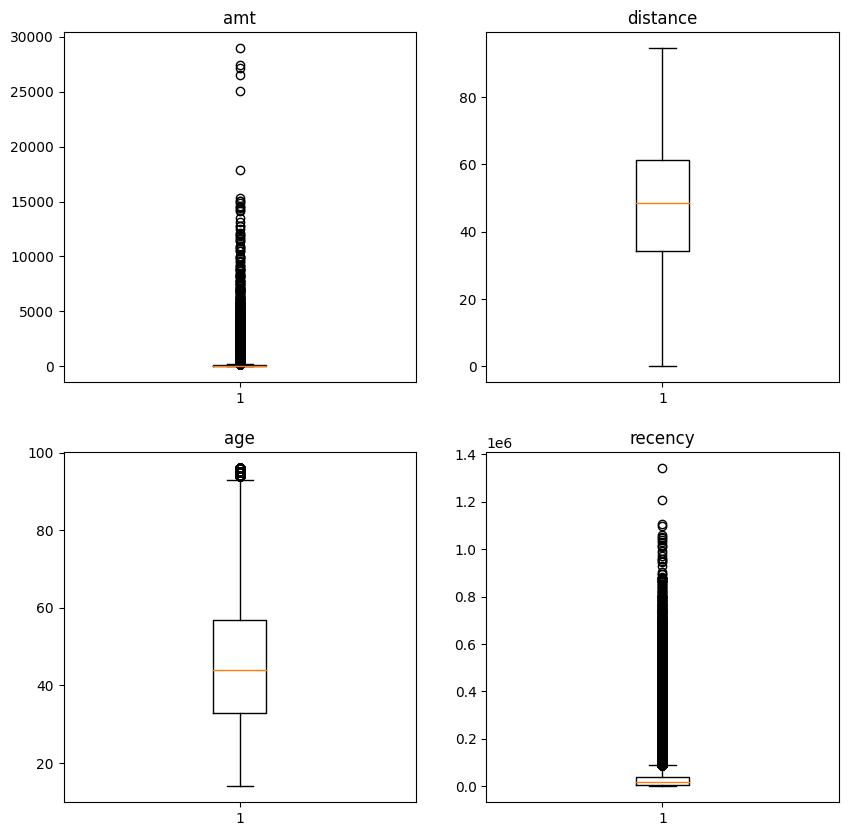

In [28]:
# 수치형 데이터의 이상치를 boxplot으로 시각화
plt.figure(figsize = (10, 10))

plt.subplot(2,2,1)
plt.boxplot(num_df['amt'])
plt.title('amt')

plt.subplot(2,2,2)
plt.boxplot(num_df['distance'])
plt.title('distance')

plt.subplot(2,2,3)
plt.boxplot(num_df['age'])
plt.title('age')

plt.subplot(2,2,4)
plt.boxplot(num_df['recency'])
plt.title('recency')

plt.show()

In [33]:
# 이상치 값들만 뽑아내는 함수 생성

def outliers_ipr(df, col):
    ## 1사분위수, 3사분위수 변수에 대입
    quartile_1, quartile_3 = np.percentile(df[col], [25, 75]) # np.percentile은 영상의 intensity 중 분위수를 구해주는 함수
    ## iqr 값을 대입
    iqr = quartile_3 - quartile_1
    ## 하단 경계 값, 상단 경계 값
    lower_whis = quartile_1 - (1.5 * iqr)
    upper_whis = quartile_3 + (1.5 * iqr)
    ## 데이터프레임에서 상단 경계보다 크거나 하단의 경계보다 작은 데이터를 출력
    outliers = df[(df[col] > upper_whis) | (df[col] < lower_whis)]
    return outliers[[col]]

In [36]:
# amt 이상치 
result = outliers_ipr(df, 'amt')
# 새로운 amt_ind 변수에 amt 이상치 인덱스 저장
amt_ind = result.index
print('amt 이상치 개수 :', len(result))

amt 이상치 개수 : 67290


In [37]:
# age 이상치
result1 = outliers_ipr(df, 'age')
# 새로운 age_ind 변수에 age 이상치 인덱스 저장
age_ind = result1.index
print('age 이상치 개수 :', len(result1))

age 이상치 개수 : 2258


In [38]:
# recency 이상치
result2 = outliers_ipr(df, 'recency')
# 새로운 recency_ind 변수에 recency 이상치 인덱스 저장
recency_ind = result2.index
print('recency 이상치 개수 :', len(result2))

recency 이상치 개수 : 96813


In [56]:
# amt_ind, age_ind, recency_ind 인덱스 합집합을 새로운 all_ind 변수에 저장 
all_ind = list(set().union(amt_ind, age_ind, recency_ind))

print('amt,age,recency 총 인덱스 개수 :',len(amt_ind)+len(age_ind)+len(recency_ind))

print('amt,age,recency 중복 인덱스 제거한 인덱스 개수 :',len(all_ind))

print('amt,age,recency 교집합 인덱스 개수 :', (len(amt_ind)+len(age_ind)+len(recency_ind)) - len(all_ind))

amt,age,recency 총 인덱스 개수 : 166361
amt,age,recency 중복 인덱스 제거한 인덱스 개수 : 161715
amt,age,recency 교집합 인덱스 개수 : 4646


In [57]:
# 이상거래 유무 확인(이상치 포함O)
df['is_fraud'].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [58]:
# 이상치제거 인덱스
diff_ind = df.index.difference(all_ind)
diff_ind

Int64Index([      0,       1,       3,       4,       5,       6,       7,
                  8,      10,      11,
            ...
            1296665, 1296666, 1296667, 1296668, 1296669, 1296670, 1296671,
            1296672, 1296673, 1296674],
           dtype='int64', length=1134960)

In [59]:
# 이상치 제거 후 is_fraud 개수
df.loc[diff_ind,:][['is_fraud']].value_counts()

is_fraud
0           1133201
1              1759
dtype: int64

In [60]:
# 이상치에서의 is_fraud 개수
df.loc[all_ind,:][['is_fraud']].value_counts()

is_fraud
0           155968
1             5747
dtype: int64